In [21]:
import pandas as pd
import matplotlib

In [13]:
df = pd.read_csv('./data/open/train.csv')

# Dataset Info.

* train.csv
    - 총 6201개의 행(rows)
    - ID : 샘플 별 고유 ID
    - SUBCLASS : 암종 (26개 존재)
    - 암환자 유전체 변이 정보 데이터 ( 유전체 관련 컬럼 4384개 )


* test.csv
    - 총 2546개의 행(rows)
    - ID : 샘플 별 고유 ID
    - 암환자 유전체 변이 정보 데이터 ( 유전체 관련 컬럼 4384개, train.csv와 동일 )


* sample_submission.csv
    - ID : 샘플 별 고유 ID
    - SUBCLASS : 예측한 암종 (학습 데이터와 동일한 26개 존재)


In [18]:
df.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


## 데이터프레임

* 열 헤더(A2M~ZYX, 4384개)는 유전자명
* 그 값은 해당 열(유전자)이
    - WT(wildtype: 변이없음)
    - {알파벳}{숫자}{알파벳 또는 *} : 단백질 시퀀스(Amino Acid Sequence)에서 {숫자}번째 알파벳인 {첫 알파벳}이 {뒷 알파벳}으로 변이됨.
        * *의 경우, {첫 알파벳}부터 뒷 모든 것 삭제.
        * fs의 경우, {첫 알파벳}에서 {뒷 알파벳:fs제외}으로 바뀌고 뒷 시퀀스에 변이 발생.
* 라벨은 'SUBCLASS' 열

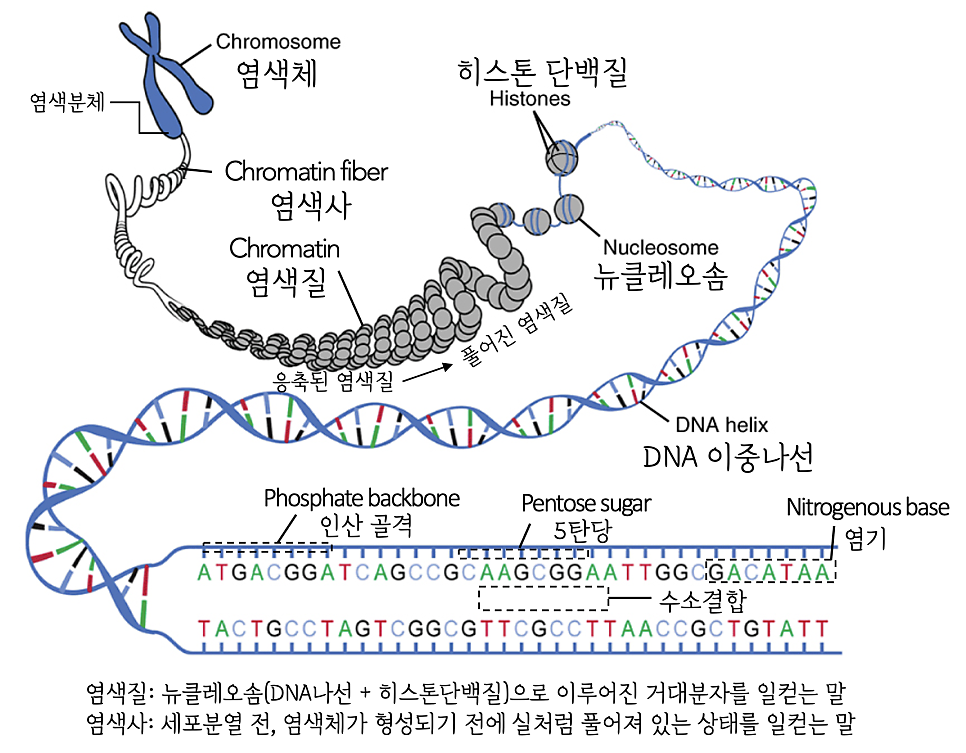

In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6201 entries, 0 to 6200
Data columns (total 4386 columns):
 #     Column      Dtype 
---    ------      ----- 
 0     ID          object
 1     SUBCLASS    object
 2     A2M         object
 3     AAAS        object
 4     AADAT       object
 5     AARS1       object
 6     ABAT        object
 7     ABCA1       object
 8     ABCA2       object
 9     ABCA3       object
 10    ABCA4       object
 11    ABCA5       object
 12    ABCA6       object
 13    ABCA8       object
 14    ABCA9       object
 15    ABCB1       object
 16    ABCB11      object
 17    ABCB4       object
 18    ABCB6       object
 19    ABCB7       object
 20    ABCB8       object
 21    ABCB9       object
 22    ABCC1       object
 23    ABCC2       object
 24    ABCC3       object
 25    ABCC4       object
 26    ABCC5       object
 27    ABCC8       object
 28    ABCD1       object
 29    ABCD2       object
 30    ABCD3       object
 31    ABCE1       object
 32    

# Insight Info.

## 변이 유형 상세 분석

1. **WT** (Wild Type):
    - 의미: 변이가 없는 정상 유전자
    - 영향: 정상적인 단백질 생성 및 기능 수행


2. **미스센스 변이** (예: R895R, S27N, C166Y):
    - 의미: DNA 서열의 한 염기가 다른 염기로 바뀌어 다른 아미노산이 만들어지는 변이
        - 예시 설명: S27N은 27번 위치의 세린(S)이 아스파라진(N)으로 변경됨을 의미
    - 영향: 단백질의 구조나 기능에 변화를 줄 수 있으며, 질병과 연관될 수 있음


3. **무의미 변이** (예: W95*, Q110*, R229*):
    - 의미: 조기 종결 코돈이 생성되어 단백질 합성이 중단되는 변이
        - 예시 설명: W95는 95번 위치의 트립토판(W)이 종결 코돈()으로 변경됨을 의미
    - 영향: 불완전한 단백질 생성으로 인한 기능 상실, 심각한 질병과 연관될 수 있음


4. **프레임시프트 변이** (예: L1854fs, K1201fs):
    - 의미: 염기의 삽입 또는 결실로 인해 코딩 프레임이 이동하는 변이
        - 예시 설명: L1854fs는 1854번 위치의 류신(L) 이후에 프레임시프트가 발생함을 의미
    - 영향: 완전히 다른 아미노산 서열 생성, 단백질 기능의 심각한 변화 또는 상실


5. **동의어 변이** (예: D623D, F736C):
    - 의미: DNA 서열은 변하지만 같은 아미노산을 코딩하는 변이
        - 예시 설명: D623D는 623번 위치의 아스파르트산(D)이 다른 코돈으로 변경되었지만 여전히 아스파르트산을 코딩함
    - 영향: 대부분 단백질 기능에 직접적인 영향을 주지 않지만, 스플라이싱이나 mRNA 안정성에 영향을 줄 수 있음

## Main Insight

* 변이 유형의 분포:
    - 대부분의 유전자는 WT로 나타나며, 이는 정상적인 상태를 의미.
    - 미스센스 변이와 동의어 변이가 상대적으로 많이 관찰되며, 이는 단일 염기 다형성(SNP)의 빈도가 높음을 시사.


* 샘플 간 차이:
    - SKCM(TRAIN_0002)과 STES(TRAIN_0005, TRAIN_0009) 샘플에서 다양한 유형의 변이가 많이 관찰됨. 이는 이러한 암 유형에서 유전적 불안정성이 높을 수 있음을 시사.
    - THCA(TRAIN_0007) 샘플은 거의 모든 유전자가 WT로, 유전적으로 안정적인 상태를 보임.


* 기능적 영향:
    - 무의미 변이와 프레임시프트 변이는 단백질 기능에 심각한 영향을 줄 수 있으므로, 이러한 변이가 발견된 유전자들은 해당 암 유형의 발병 메커니즘과 연관될 가능성이 높다.
    - 미스센스 변이의 경우, 그 위치와 변경된 아미노산의 특성에 따라 단백질 기능에 미치는 영향이 다양할 수 있다.

# Code

### 1. Null(Na) 확인

In [31]:
temp = df.replace('', pd.NA) # 빈 거 뿐만 아니라 str로 ''된 것도 Na 처리

# 각 열의 빈 값 개수 확인
empty_counts = temp.isna().sum()

# 빈 값이 있는 열 찾기
columns_with_empty = empty_counts[empty_counts > 0]

In [27]:
empty_counts

ID          0
SUBCLASS    0
A2M         0
AAAS        0
AADAT       0
           ..
ZNRF4       0
ZPBP        0
ZW10        0
ZWINT       0
ZYX         0
Length: 4386, dtype: int64

In [28]:
columns_with_empty

Series([], dtype: int64)

결론 : 모든 셀은 빈 데이터가 없이 꽉 차있다. // Na 값 처리 완료

### 2. 모든 행이 유효한 데이터를 가지고 있는지 확인

In [29]:
train_wt_rows = df[(df.iloc[:, 2:] == 'WT').all(axis=1)]

print('데이터셋에서 값이 모두 WT인 행 개수')
print('trainSet: ', len(train_wt_rows))

데이터셋에서 값이 모두 WT인 행 개수
trainSet:  94


값이 모두 WT인 행의 라벨값 분포


<Axes: ylabel='count'>

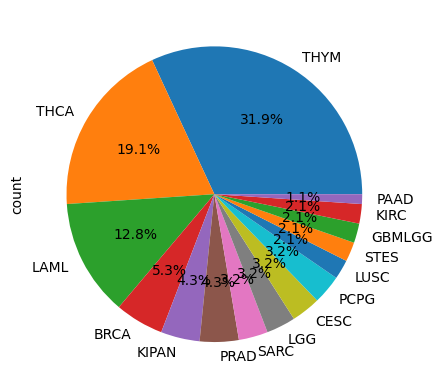

In [30]:
print('값이 모두 WT인 행의 라벨값 분포')
train_wt_rows['SUBCLASS'].value_counts().plot(kind='pie', autopct='%1.1f%%')